# Khoa học dữ liệu - Dữ liệu người dùng Facebook

### Câu 1: Phương pháp Bootstrap

Import các thư viện

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

Đầu tiên, chúng ta sẽ đọc dữ liệu đầu vào và lựa chọn biến đặc trưng là tuổi

In [2]:
# Read dataset
data = pd.read_csv('pseudo_facebook.csv')

# Choose age column from dataset
data_age_column = data.age

Tiếp theo là phần cài đặt phương pháp Bootstrap, dữ liệu trả về  là phân bố lấy mẫu bằng Histogram và dải tin cậy của giá trị trung bình của tuổi

In [32]:
# n is sample size
# M is number of bootstrap samplings
# x is confidence interval in %
def bootstrap(n, M, x):
    mean = []
    sample = []

    for i in range(M):
        random_sample = random.sample(data_age_column.tolist(), n)
        mean.append(np.mean(random_sample))
        sample.append(random_sample)
        
    # Confidence interval
    # x = 100 * (1 - 2 * alpha)
    alpha = (100 - x) / 200
    mean.sort()
    lower_bound = mean[int(M * alpha)]
    upper_bound = mean[int(M * (1 - alpha))]
    
    plt.figure(figsize=(12, 8))
    fig = sns.histplot(mean, kde=True, bins=10, stat="probability")
    fig.set_xlabel('Age')
    plt.axvline(lower_bound, color='r')
    plt.axvline(upper_bound, color='r')
    plt.show()

Gọi hàm Bootstrap với tham số đầu vào theo thứ tự là (sample size, number of bootstrap samplings, confidence interval)

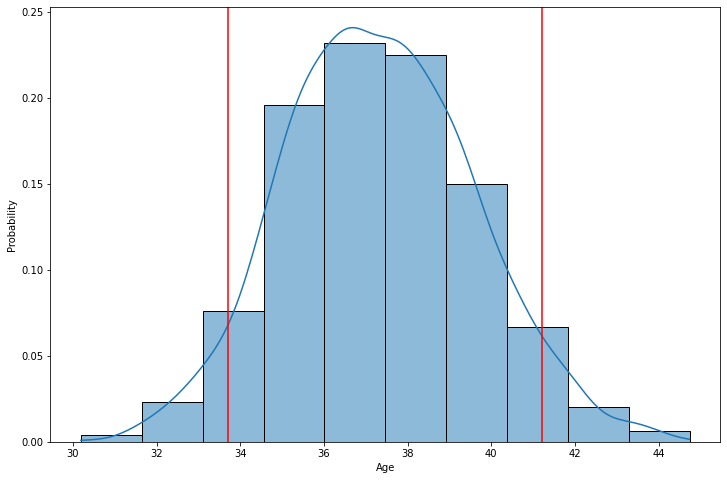

In [5]:
bootstrap(100, 3000, 90)

### Câu 2:

#### 1. Phân tích về nhóm tuổi

Dựa vào dữ liệu đầu ở câu 1, đầu tiên ta sẽ xét xem số tuổi thấp nhất và cao nhất của người dùng Facebook

In [6]:
print('Min age of a person on facebook: ', data['age'].min())
print('Max age of a person on facebook: ', data['age'].max())

Min age of a person on facebook:  13
Max age of a person on facebook:  113


Số tuổi của người dùng Facebook dao động từ 13 đến 113 tuổi nên ta sẽ chọn cận dưới là 10 tuổi và cận trên là 120 tuổi, sau đó ta tiến hành chia thành các nhóm tuổi. Ở đây ta chia thành 11 nhóm tuổi và phân loại người dùng theo nhóm tuổi vào cột "age_group"

In [7]:
# Add column "age_group" to dataset
age_group = ['10-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100', '101-110', '111-120']
data['age_group'] = pd.cut(data_age_column, bins=np.arange(10, 121, 10), labels=age_group, right=True)

Tiếp theo, ta đếm xem số lượng người dùng Facebook nằm trong khoảng độ tuổi nào nhiều nhất

In [8]:
count_age_group = data['age_group'].value_counts().reset_index().rename(columns={'index':'age_group', 'age_group':'count'})
count_age_group

,age_group,count
0,21-30,28646
1,10-20,24752
2,31-40,12491
3,51-60,9319
4,41-50,8968
5,61-70,6855
6,101-110,3449
7,71-80,2249
8,91-100,1219
9,81-90,817


Ta tiến hành vẽ biểu đồ pointplot thể hiện số lượng người sử dụng Facebook ở các nhóm tuổi

<AxesSubplot:xlabel='age_group', ylabel='count'>

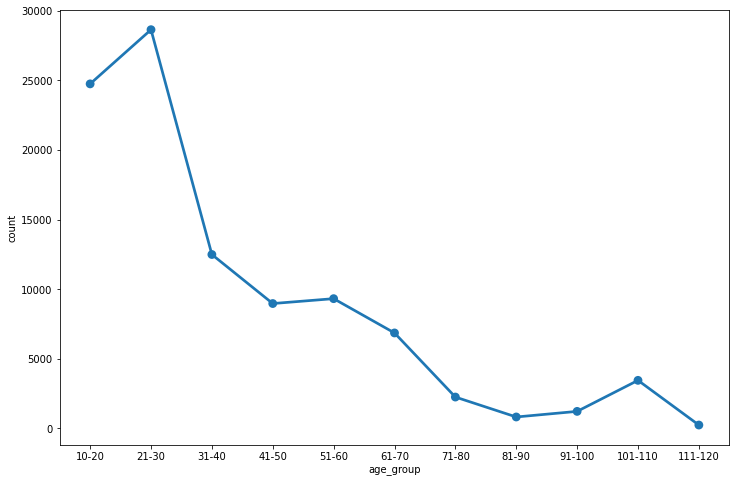

In [9]:
plt.figure(figsize=(12, 8))
sns.pointplot(x='age_group', y='count', data=count_age_group)

Từ biểu đồ trên, ta có thể thấy rằng phần lớn người dùng nằm trong độ tuổi từ 10 đến 30 tuổi. Độ tuổi từ 40 và sau 40 có xu hướng giảm dần.

#### 2. Phân tích về giới tính

Đầu tiên, ta xét số lượng người dùng Facebook ở nam giới và nữ giới:

In [10]:
count_gender = data['gender'].value_counts().reset_index().rename(columns={'gender':'count','index':'gender'})
count_gender

,gender,count
0,male,58574
1,female,40254


Ta tiến hành vẽ biểu đồ countplot thể hiện số lượng người dùng Facebook ở nam giới và nữ giới:

<AxesSubplot:xlabel='gender', ylabel='count'>

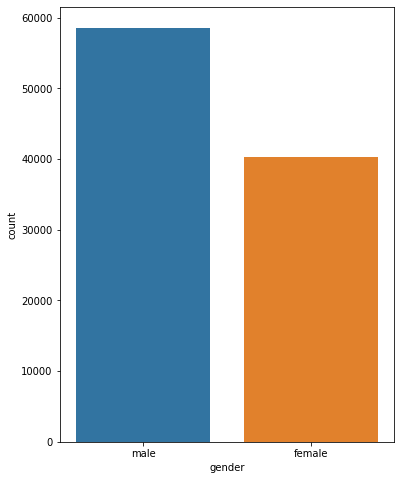

In [11]:
plt.figure(figsize=(6, 8))
sns.countplot(x='gender', data=data)

Dựa vào biểu đồ và số liệu ta có thể thấy rằng số lượng nam giới sử dụng Facebook nhiều hơn nữ giới (hơn 18.54%)

Về số lượng bạn bè và giới tính, ta có biểu đồ như sau:

<AxesSubplot:xlabel='gender', ylabel='friend_count'>

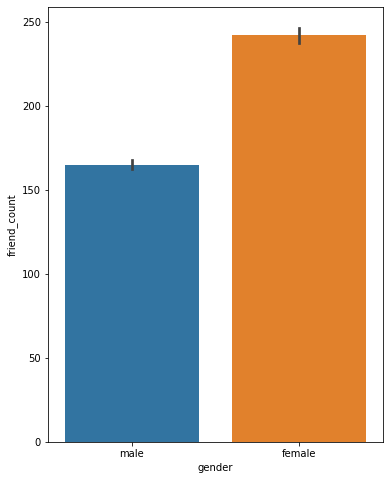

In [19]:
plt.figure(figsize=(6, 8))
sns.barplot(x='gender', y='friend_count', data=data)

Người dùng Facebook là nữ giới có nhiều bạn bè hơn nam giới.

Tiếp theo ta xét về số lượng lời mời kết bạn ở cả hai giới:

<AxesSubplot:xlabel='gender', ylabel='friendships_initiated'>

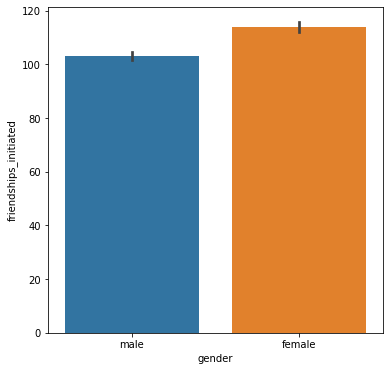

In [22]:
plt.figure(figsize=(6, 6))
sns.barplot(x='gender', y='friendships_initiated', data=data)

Từ biểu đồ trên, ta thấy rằng người dùng nữ giới gửi nhiều lời mời kết bạn hơn so với người dùng nam giới nhưng vẫn không có sự chênh lệch quá lớn.

Tiếp theo ta xét về số lượng like các bài đăng trên Facebook trong các nhóm tuổi ở cả hai giới tính:

<AxesSubplot:xlabel='age_group', ylabel='likes'>

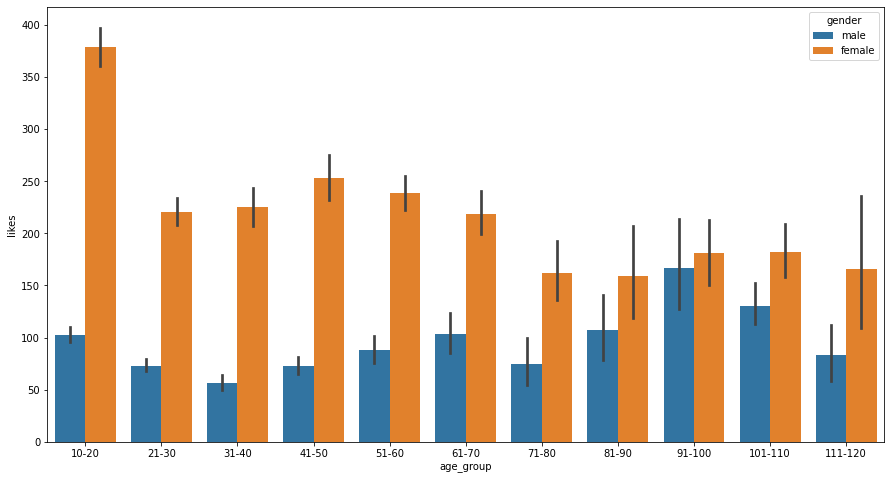

In [12]:
plt.figure(figsize=(15, 8))
sns.barplot(x='age_group', y='likes', data=data, hue='gender')

Ở biểu đồ thể hiện số lượng người dùng Facebook ở nam giới và nữ giới, ta thấy số lượng người dùng nữ giới ít hơn nam giới nhưng khi nhìn vào số lượng like các bài đăng ở các nhóm tuổi, ta thấy rằng số lượng like các bài đăng của nữ giới ở mọi lứa tuổi cao hơn so với nam giới. Ta có thể nói rằng nữ giới hoạt động Facebook nhiều hơn nam giới.

Tiếp theo ta xét về số lượng like nhận được trên Facebook trong các nhóm tuổi ở cả hai giới tính:

<AxesSubplot:xlabel='age_group', ylabel='likes_received'>

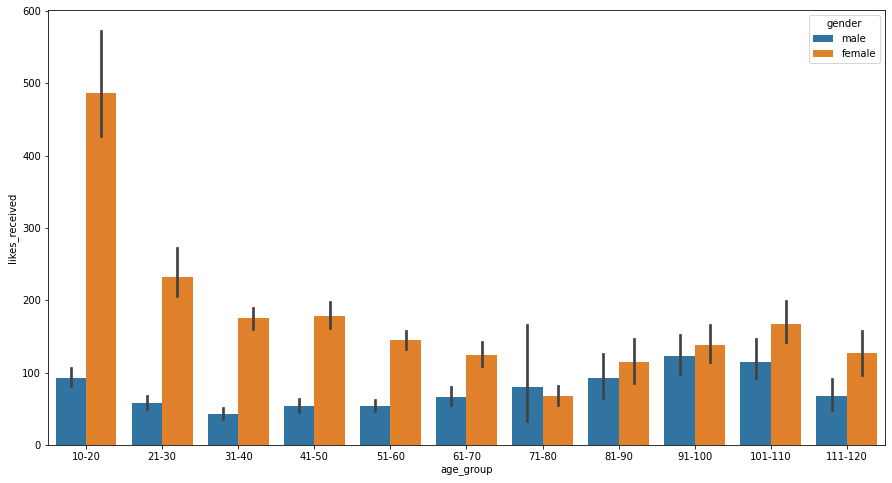

In [14]:
plt.figure(figsize=(15, 8))
sns.barplot(x='age_group', y='likes_received', data=data, hue='gender')

Từ biểu đồ trên, ta thấy các bài đăng của người dùng nữ giới ở hầu hết các nhóm tuổi đều nhận được nhiều lượt like hơn so với nam giới.

#### 3. Phân tích về thời gian sử dụng Facebook


Dựa vào dữ liệu đầu ở câu 1, đầu tiên ta sẽ xét xem thời gian sử dụng thấp nhất và cao nhất của người dùng Facebook

In [33]:
print('Min tenure on facebook: ', data['tenure'].min(), 'day')
print('Max tenure on facebook: ', data['tenure'].max(), 'days')

Min tenure on facebook:  0.0 day
Max tenure on facebook:  3139.0 days


Thời gian của người dùng Facebook dao động từ 0 đến 3139 ngày. Ở đây 3139 ngày tương đương với 8.6 năm (nếu xét mỗi năm có 365 ngày, không tính năm nhuận và năm không nhuận). Xét theo số năm, thời gian của người dùng Facebook dao động từ 0 đến 8.6 năm nên ta sẽ chọn cận dưới là 0 năm và cận trên là 9 năm, sau đó ta tiến hành chia thành 9 nhóm và phân loại nhóm người dùng vào cột "tenure_group"

In [34]:
# Add column "tenure_group" to dataset
tenure_group = ['0-1 year', '1-2 years', '2-3 years', '3-4 years', '4-5 years', '5-6 years', '6-7 years', '7-8 years', '8-9 years']
data['tenure_group'] = pd.cut(data['tenure'], bins=np.arange(0, 365 * 9 + 1, 365), labels=tenure_group, right=True)

Tiếp theo, ta đếm xem số lượng người dùng Facebook nằm trong khoảng thời gian nào nhiều nhất

In [53]:
count_tenure_group = data['tenure_group'].value_counts().reset_index().rename(columns={'index':'tenure_group', 'tenure_group':'count'})
print('Người dùng trong nhóm 0 đến 1 năm chiếm: ', round((count_tenure_group['count'][0] / count_tenure_group['count'].sum()) * 100, 2), '%')
count_tenure_group

Người dùng trong nhóm 0 đến 1 năm chiếm:  44.06 %


,tenure_group,count
0,0-1 year,43588
1,1-2 years,33366
2,2-3 years,9860
3,3-4 years,5448
4,4-5 years,4557
5,5-6 years,1507
6,6-7 years,581
7,7-8 years,15
8,8-9 years,9


Ta tiến hành vẽ biểu đồ pointplot thể hiện số lượng người dùng Facebook ở các nhóm thời gian sử dụng

<AxesSubplot:xlabel='tenure_group', ylabel='count'>

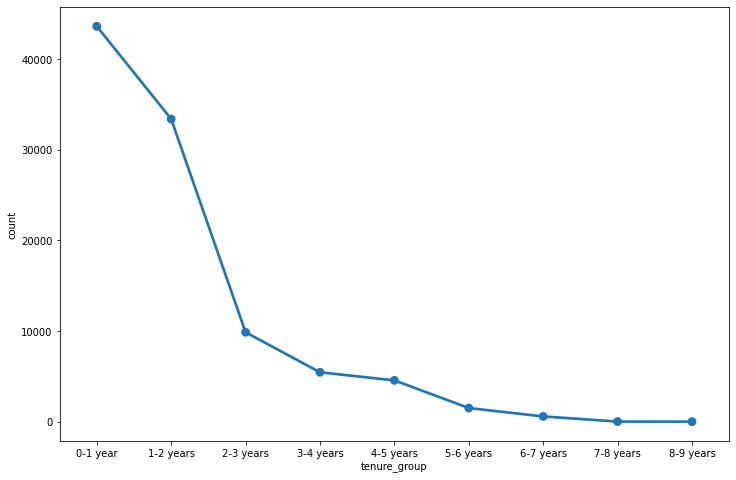

In [20]:
plt.figure(figsize=(12, 8))
sns.pointplot(x='tenure_group', y='count', data=count_tenure_group)

Từ biểu đồ trên, ta thấy phần lớn người dùng Facebook vẫn còn sử dụng nằm trong khoảng từ 0 đến 1 năm và giảm 23.45% trong nhóm từ 1 đến 2 năm so với ban đầu. Ngoài ra, ta thấy sau 5 đến 6 năm sử dụng Facebook, người dùng có xu hướng dừng sử dụng.

Cuối cùng, ta xét về thời gian hoạt động trong một ngày dựa theo số lượng like các bài đăng trên Facebook. Thời gian hoạt động trong một ngày được tính bằng tổng số lượng like các bài đăng chia cho thời gian sử dụng Facebook. Sau đó ta vẽ biểu đồ thể hiện thời gian hoạt động trong một ngày dựa theo số lượt like các bài đăng của hai giới ở các nhóm tuổi:

<AxesSubplot:xlabel='age_group', ylabel='activity_per_day'>

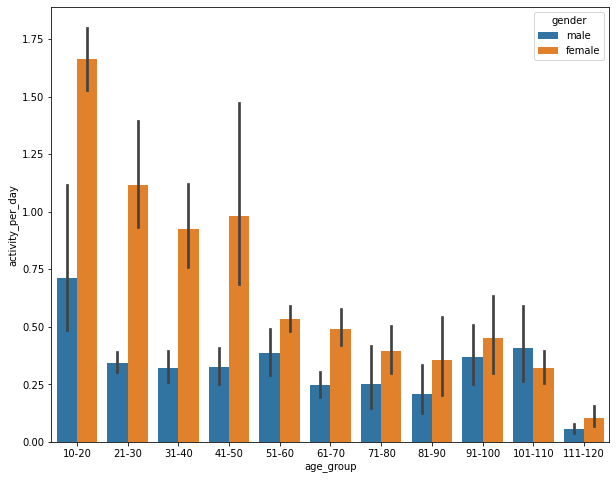

In [29]:
#  Age group and activity per day
data['activity_per_day'] = (data['likes'] / data['tenure']).replace([np.nan, np.inf, -np.inf], 0)
plt.figure(figsize=(10, 8))
sns.barplot(x='age_group', y='activity_per_day', data=data, hue='gender')

Ta thấy người dùng ở nhóm tuổi từ 10-20 hoạt động Facebook mỗi ngày nhiều nhất và hầu như nữ giới sử dụng Facebook nhiều hơn nam giới ở mọi lứa tuổi.

#### Nhận xét
- Phần lớn người dùng Facebook nằm trong khoảng từ 10 đến 30 tuổi.
- Số lượng người dùng Facebook là nam giới nhiều hơn nữ giới 18.54%.
- Người dùng Facebook là nữ giới hoạt dộng nhiều hơn nam giới
- Phần lớn người dùng trên Facebook có thời gian hoạt động từ 0 đến 1 năm (chiếm 44.06 %)